In [2]:
import gym
from gym import utils
import numpy as np
import itertools
import matplotlib
import pandas as pd     #try to see what happens if you remove this
                         #its used in plotting.py
from collections import defaultdict
import plotting


matplotlib.style.use('ggplot')

In [3]:
env=gym.make('WindyGridworld-v0')

In [4]:
action_mappings = {
    0: '\u2191', #up
    1: '\u2192', #right 
    2: '\u2193',  #down
    3: '\u2190',  #left
}

In [5]:
def gridplotter(policy):
    a=0
    control=0
    #print(policy)
    start_state= env.reset()
    print(" %d is the Start State" % start_state)
    for state in policy:
        while control != state :
            print("*"+"  ", end='')
            control +=1
        
        if int(state/10) > a:
            print("\n")
            a+=1
            
        print(action_mappings[np.argmax(policy[state])] + "  ", end='')
        control += 1

In [6]:
def epsilon_greedy_policy(observation , Q, epsilon, nA):
    A= np.ones(nA, dtype=float) * epsilon / nA
    best_action= np.argmax(Q[observation])
    A[best_action] += (1 - epsilon)
    return A

In [7]:
def sarsa_control_epsilon_greedy(env, n_episodes, epsilon, discount_factor, alpha ):
    
    Q=defaultdict(lambda: np.zeros(env.action_space.n))
    final_policy=defaultdict(lambda: np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(episode_lengths=np.zeros(n_episodes),episode_rewards=np.zeros(n_episodes))
    
    for i in range(n_episodes):
        state=env.reset()
        epsilon = 1/(i+1)
        #print(epsilon)
        done=False
        prob= epsilon_greedy_policy(state, Q, epsilon, env.action_space.n)  #point 2 to observe
        action = np.random.choice(np.arange(len(prob)), p=prob)
        while not done:             #point 1 to observe
            
            next_state, reward, done, _ = env.step(action)
            next_prob = epsilon_greedy_policy(next_state, Q , epsilon, env.action_space.n)   #point 2 to observe
            next_action = np.random.choice(np.arange(len(next_prob)),p=next_prob )
            
            Q[state][action] += alpha*(reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] += 1
            
            state=next_state
            action=next_action
        
    for _state in Q:
        final_policy[_state]= epsilon_greedy_policy( _state, Q, 0.0 , env.action_space.n)
        
    return Q, final_policy , stats

In [8]:
Q, policy, stats = sarsa_control_epsilon_greedy(env, n_episodes= 2000, epsilon= 1.0, discount_factor= 1.0, alpha=0.1)

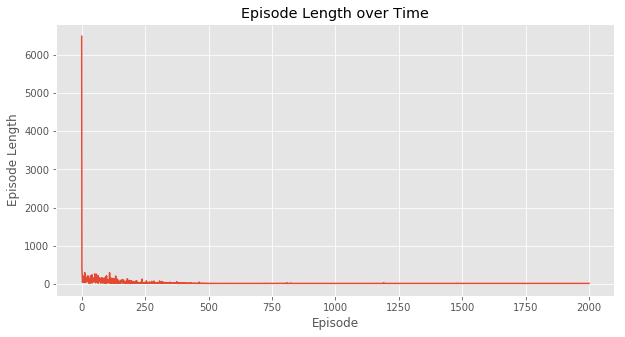

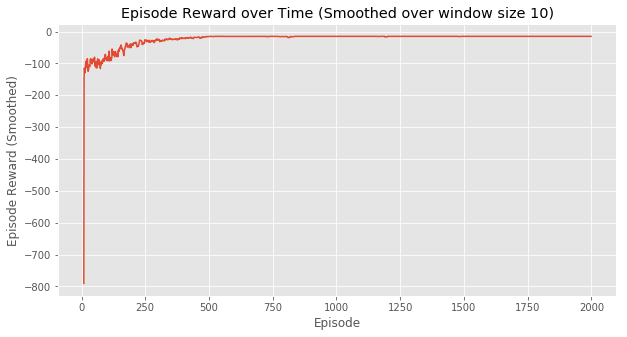

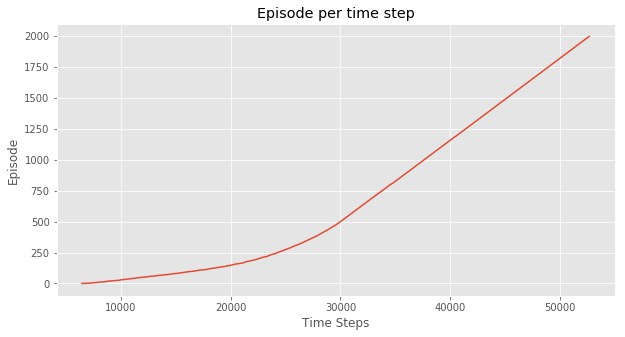

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [9]:
plotting.plot_episode_stats(stats)

In [10]:
gridplotter(policy)   #star marks represents that the state has never been visited

 30 is the Start State
↑  ↑  ↓  →  →  →  →  →  →  ↓  

←  →  ←  →  →  →  →  →  ↓  ↓  

↑  →  →  →  →  →  →  ↓  ↓  ↓  

→  →  →  →  →  →  →  ↑  ←  ↓  

↓  →  →  →  →  →  *  ↓  ←  ←  

↓  →  ←  →  →  *  *  →  →  ←  

→  →  ↑  ←  *  *  *  *  ←  ↑  

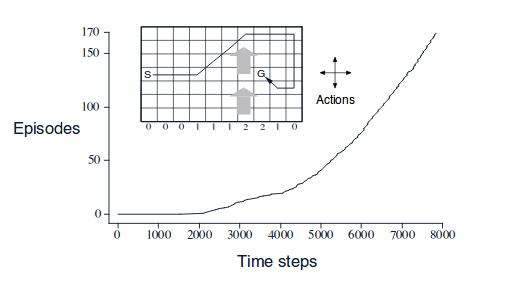

##### Credits: Sutton and Barto: Introduction to reinforcement learning

# Points to be noted down:

#### 1) Policy update:

The code that denny britz wrote used the fact that the policy was updated only after each episode, not at every time step.
But what i did was updating it at every time step.

My Claim :The point to note here is that this update at every time step would only be  effective if the agent visits the same step again and again.
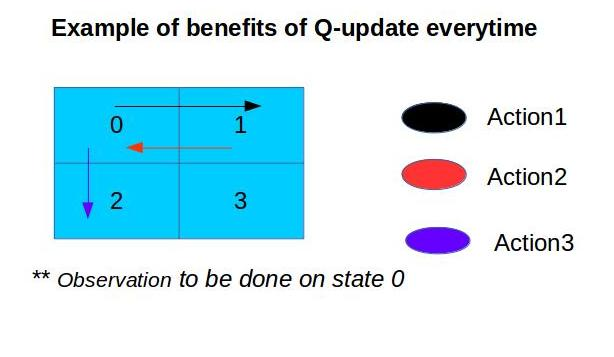

#### 2)Why is pandas added as import.?

It is not used here in this code except that it is used in plotting.py .. Try removing that and see what happens.